In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
all_data = pd.read_csv(url, sep = '\t')

In [4]:
all_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
all_data.shape

(4622, 5)

In [6]:
all_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Question 1: Which is the most ordered item?

In [7]:
result1 = all_data.groupby('item_name').sum()
result1

,order_id,quantity
item_name,,
6 Pack Soft Drink,52322,55
Barbacoa Bowl,53972,66
Barbacoa Burrito,74718,91
Barbacoa Crispy Tacos,5613,12
Barbacoa Salad Bowl,9708,10
Barbacoa Soft Tacos,18725,25
Bottled Water,175944,211
Bowl,472,4
Burrito,1550,6


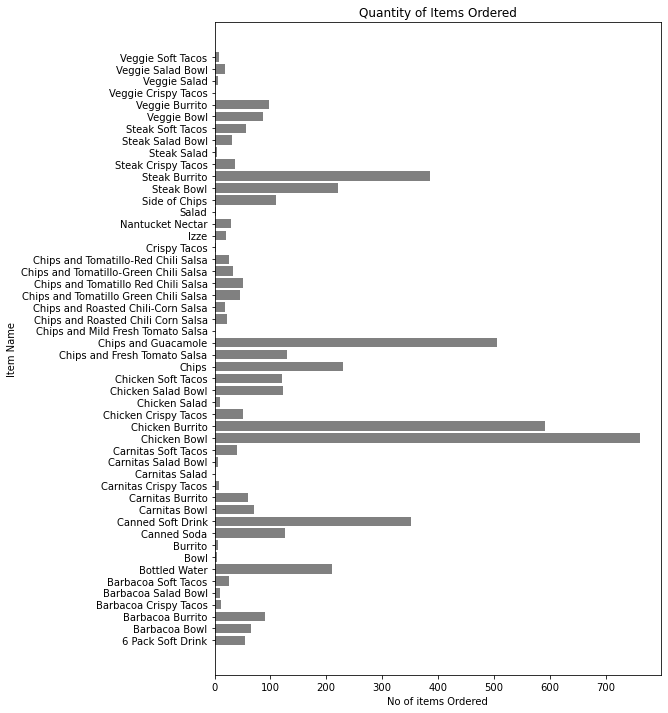

In [14]:
items = [item for item, df in all_data.groupby('item_name')]
plt.subplots(figsize=(8,12))
plt.barh(items, result1['quantity'], color='grey')
plt.xlabel('No of items Ordered')
plt.ylabel('Item Name')
plt.title('Quantity of Items Ordered')
plt.show()

#### Question 2: What was the most ordered item in the choice_description column?

In [17]:
df1 = all_data.choice_description.value_counts()

In [18]:
df1.head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

#### Question 3: How many items where ordered in total?

In [19]:
total_items_ordered = all_data.quantity.sum()
total_items_ordered

4972

#### Question 4: Total Revenue?

In [40]:
def get_price(address):
    return address.split('$')[1] 
          # because of the space before city

all_data['item_price'] = all_data['item_price'].apply(lambda x: get_price(x))

all_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [45]:
all_data['item_price'] = pd.to_numeric(all_data['item_price'])

all_data['sales'] = all_data['item_price'] * all_data['quantity']

In [46]:
all_data.head()

,order_id,quantity,item_name,choice_description,item_price,sales
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [48]:
print(f'The total revenue was $ {all_data.sales.sum()}')

The total revenue was $ 39237.02


#### Question 5: Total Orders?

In [61]:
orders = all_data.order_id.value_counts().count()

In [62]:
print(f'The total number of orders were {orders}')

The total number of orders were 1834


#### Question 6: What is the average revenue amount per order?

In [77]:
revenue = all_data.groupby('order_id').sum().mean()['sales']
revenue

21.394231188658654

In [81]:
print(f'Average revenue per order = ${round(revenue, 2)}')

Average revenue per order = $21.39
